# section 1

## 1.1 بخش اول: شناسایی سیستم با شبکههای عصبی RBF

ایجاد دیتاست
1.1.1

In [113]:
import numpy as np

In [114]:
# تعداد نمونه‌ها
N = 1000

# تولید سیگنال ورودی
t = np.arange(N)
u = np.sin((2*np.pi*t)/250)

# خروجی سیستم
y = np.zeros(N)
y[0] = 0
y[1] = 0

for t in range(2, N):
  y[t] = (y[t-1])/(1 + y[t-2]) + u[t-1] ** 3

# ساخت دیتاست

X = np.zeros((N-2,3))
Y = np.zeros(N-2)

for t in range(2, N):
  X[t-2, :] = [y[t-1], y[t-2], u[t-1]]
  Y[t-2] = y[t]

print(X.shape, Y.shape)

(998, 3) (998,)


In [115]:
# from sklearn.preprocessing import StandardScaler

# # Instantiate the StandardScaler
# scaler = StandardScaler()

# # Fit the scaler to X and transform X
# X = scaler.fit_transform(X)
# Y = scaler.fit_transform(Y.reshape(-1, 1))

1.1.2 داده تست و آموزش

In [116]:
from sklearn.model_selection import train_test_split

In [117]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=33)

## 1.2 بخش دوم: پیاده سازی RBFNN ایستا

1.2.2 فعال ساز

In [118]:
def rbf_gaussian(x, miu, sigma):
  dist = np.linalg.norm(x - miu)
  return np.exp(-(dist**2)/(sigma**2))

In [119]:
x = np.array([1.0, 1.0])
miu = np.array([1.0, 1.0])
sigma = 1.0

output = rbf_gaussian(x, miu, sigma)
print(output)

1.0


## 1.3 بخش سوم: آموزش از طریق حداقل مربعات خطی (LLS)

1.3.1

In [120]:
# انتخاب رندوم نقاط تصادفی
K = 30
np.random.seed(33)

# انتخاب مراکز تصادفی
centers_idx = np.random.choice(len(X_train), K, replace=False)
miu = X_train[centers_idx]

In [121]:
# محاسبه عرض ثابت
from scipy.spatial.distance import pdist
sigma = np.mean(pdist(miu)) # میانگین فاصله بین مراکز

In [122]:
# ساخت ماتریس phi برای آموزش
phi_train = np.zeros((len(X_train), K))

for i, x in enumerate(X_train):
  for j in range(K):
    phi_train[i, j] = rbf_gaussian(x, miu[j], sigma)

In [123]:
# آموزش شبکه LLS آموزش
alpha = np.linalg.pinv(phi_train) @ y_train
# پیش‌بینی آموزش
y_train_pred = phi_train @ alpha

In [124]:
# ساخت ماتریس phi براس تست
phi_test = np.zeros((len(X_test), K))

for i, x in enumerate(X_test):
  for j in range(K):
    phi_test[i, j] = rbf_gaussian(x, miu[j], sigma)

# پیش‌بینی تست
y_test_pred = phi_test @ alpha

In [125]:
# تابع rmse
def rmse(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred)**2))

In [126]:
rmse_train = rmse(y_train, y_train_pred)
rmse_test = rmse(y_test, y_test_pred)

In [127]:
print('rmse train =' , rmse_train)
print('rmse test =' , rmse_test)

rmse train = 4.683289283427306
rmse test = 4.984779461856277


1.3.2

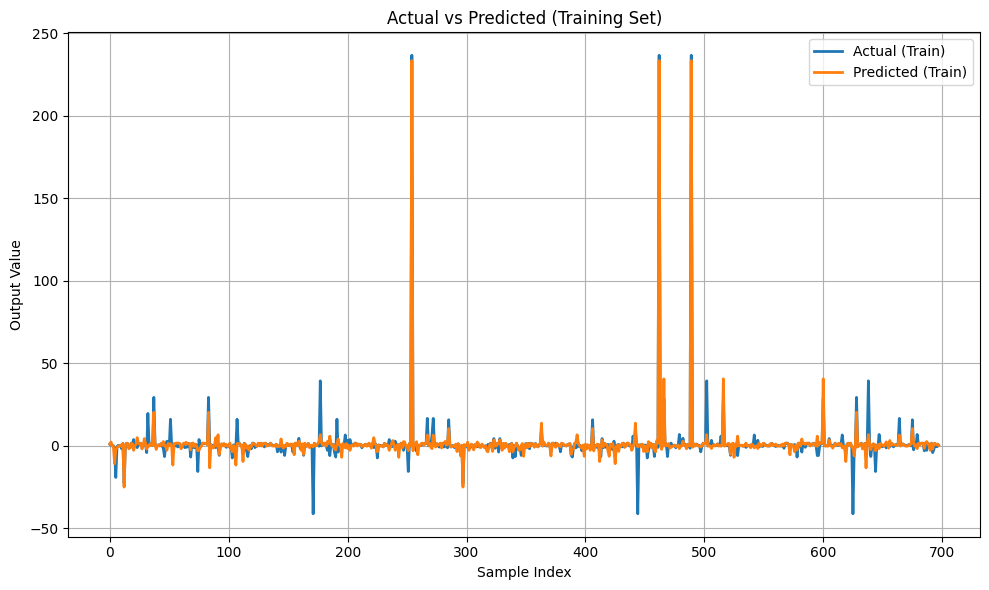

In [128]:
import matplotlib.pyplot as plt

n_samples = len(y_train)
x = np.arange(n_samples)

plt.figure(figsize=(10,6))
plt.plot(x, y_train, label='Actual (Train)', linewidth=2)
plt.plot(x, y_train_pred, label='Predicted (Train)', linewidth=2)
plt.xlabel('Sample Index')
plt.ylabel('Output Value')
plt.title('Actual vs Predicted (Training Set)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

1.3.3

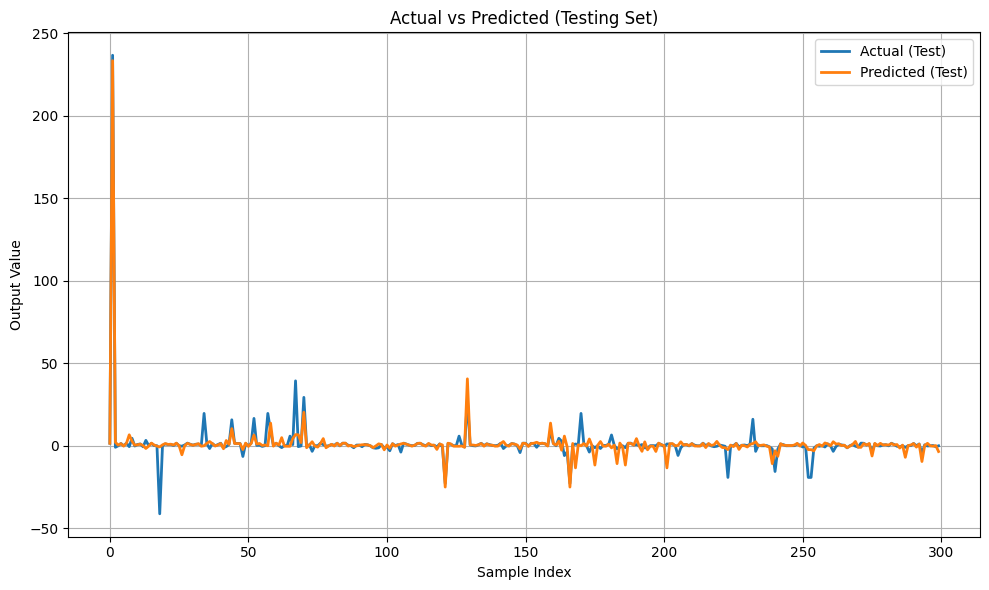

In [129]:
n_samples = len(y_test)
x = np.arange(n_samples)

plt.figure(figsize=(10,6))
plt.plot(x, y_test, label='Actual (Test)', linewidth=2)
plt.plot(x, y_test_pred, label='Predicted (Test)', linewidth=2)
plt.xlabel('Sample Index')
plt.ylabel('Output Value')
plt.title('Actual vs Predicted (Testing Set)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

1.3.5

In [130]:
# تابع برای ساخت فی
def build_phi(x, centers, sigma):
    phi = np.zeros((len(x), len(centers)))
    for i, x in enumerate(x):
      for j in range(len(centers)):
        phi[i, j] = rbf_gaussian(x, centers[j], sigma)

    return phi

In [131]:
sigma = 23

In [132]:
K = [10, 20,30, 50,70, 100,150, 200]
rmse_train_list_k = []
rmse_test_list_k = []

for k in K:
    # انتخاب مراکز تصادفی
  centers_idx = np.random.choice(len(X_train), k, replace=False)
  miu = X_train[centers_idx]
    # محاسبه عرض ثابت

  phi_train = build_phi(X_train, miu, sigma)
  alpha = np.linalg.pinv(phi_train) @ y_train
  y_train_pred = phi_train @ alpha

  phi_test = build_phi(X_test, miu, sigma)
  y_test_pred = phi_test @ alpha

  rmse_train = rmse(y_train, y_train_pred)
  rmse_test = rmse(y_test, y_test_pred)
  rmse_train_list_k.append(rmse_train)
  rmse_test_list_k.append(rmse_test)
  print(f'K = {k}, rmse_train = {rmse_train}, rmse_test = {rmse_test}')


K = 10, rmse_train = 12.453720439961568, rmse_test = 12.034499086900299
K = 20, rmse_train = 6.572277312076199, rmse_test = 7.3029185186062735
K = 30, rmse_train = 4.132032564097279, rmse_test = 4.076176173015463
K = 50, rmse_train = 4.091337234151807, rmse_test = 3.980289837830919
K = 70, rmse_train = 3.8418680298005885, rmse_test = 3.6854073683434723
K = 100, rmse_train = 3.8431829584395616, rmse_test = 3.6968225711448635
K = 150, rmse_train = 3.620439277365415, rmse_test = 3.3982362020792576
K = 200, rmse_train = 3.51720188934759, rmse_test = 3.237122110564121


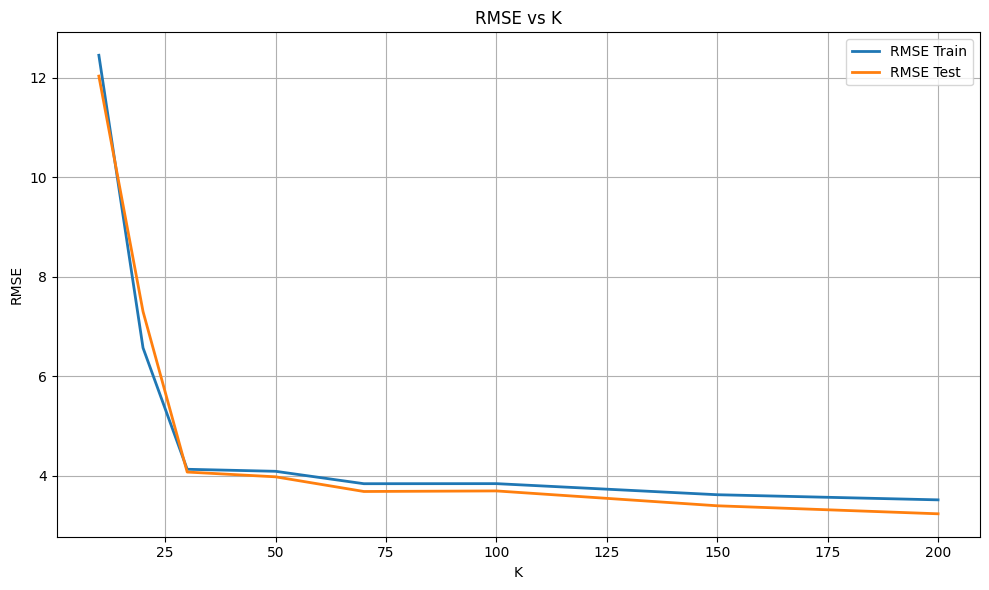

In [133]:
plt.figure(figsize=(10,6))
plt.plot(K, rmse_train_list_k, label='RMSE Train', linewidth=2)
plt.plot(K, rmse_test_list_k, label='RMSE Test', linewidth=2)
plt.xlabel('K')
plt.ylabel('RMSE')
plt.title('RMSE vs K')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

1.3.7

In [134]:
K = 50
sigmas = [0.5, 1, 5, 7, 10, 23, 30, 40, 50]

rmse_train_list_s = []
rmse_test_list_s = []

np.random.seed(33)
centers_idx = np.random.choice(len(X_train), K, replace=False)

for sigma in sigmas:
    # انتخاب مراکز تصادفی
  miu = X_train[centers_idx]
    # محاسبه عرض ثابت
  phi_train = build_phi(X_train, miu, sigma)
  alpha = np.linalg.pinv(phi_train) @ y_train
  y_train_pred = phi_train @ alpha

  phi_test = build_phi(X_test, miu, sigma)
  y_test_pred = phi_test @ alpha

  rmse_train = rmse(y_train, y_train_pred)
  rmse_test = rmse(y_test, y_test_pred)
  rmse_train_list_s.append(rmse_train)
  rmse_test_list_s.append(rmse_test)
  print(f'sigma = {sigma}, rmse_train = {rmse_train}, rmse_test = {rmse_test}')

sigma = 0.5, rmse_train = 16.46023750959244, rmse_test = 14.782173363877995
sigma = 1, rmse_train = 16.298566623484817, rmse_test = 14.540273481760998
sigma = 5, rmse_train = 16.01812168000164, rmse_test = 14.22237342442734
sigma = 7, rmse_train = 15.996909911024947, rmse_test = 14.184913769937346
sigma = 10, rmse_train = 15.984836486278768, rmse_test = 14.184731206792184
sigma = 23, rmse_train = 4.069727496572775, rmse_test = 3.9924507829269427
sigma = 30, rmse_train = 4.116220293532527, rmse_test = 4.135232088946846
sigma = 40, rmse_train = 4.388444902811877, rmse_test = 4.525672202190313
sigma = 50, rmse_train = 4.40459553378949, rmse_test = 4.548123969390678


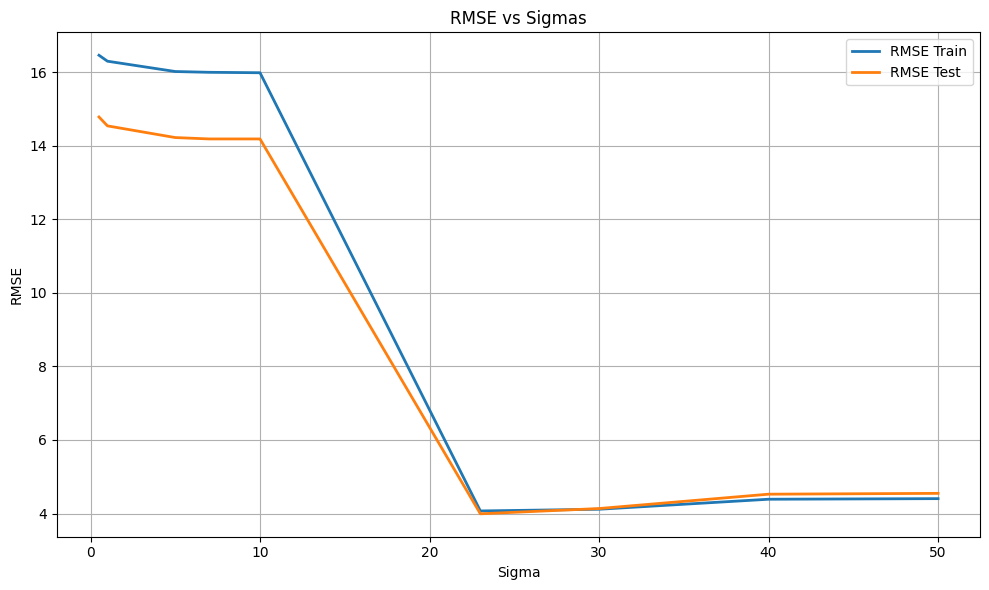

In [135]:
plt.figure(figsize=(10,6))
plt.plot(sigmas, rmse_train_list_s, label='RMSE Train', linewidth=2)
plt.plot(sigmas, rmse_test_list_s, label='RMSE Test', linewidth=2)
plt.xlabel('Sigma')
plt.ylabel('RMSE')
plt.title('RMSE vs Sigmas')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [136]:
# best k , sigma = 50 , 23

best_k = 50
best_sigma = 23

np.random.seed(33)
centers_idx = np.random.choice(len(X_train), best_k , replace=False)
miu = X_train[centers_idx]
phi_train = build_phi(X_train, miu, best_sigma)
alpha = np.linalg.pinv(phi_train) @ y_train
y_train_pred = phi_train @ alpha

phi_test = build_phi(X_test, miu, best_sigma)
y_test_pred = phi_test @ alpha


In [137]:
rmse_train_best = rmse(y_train, y_train_pred)
rmse_test_best = rmse(y_test, y_test_pred)
print(f'rmse_train_best = {rmse_train_best}, rmse_test_best = {rmse_test_best}')

rmse_train_best = 4.069727496572775, rmse_test_best = 3.9924507829269427


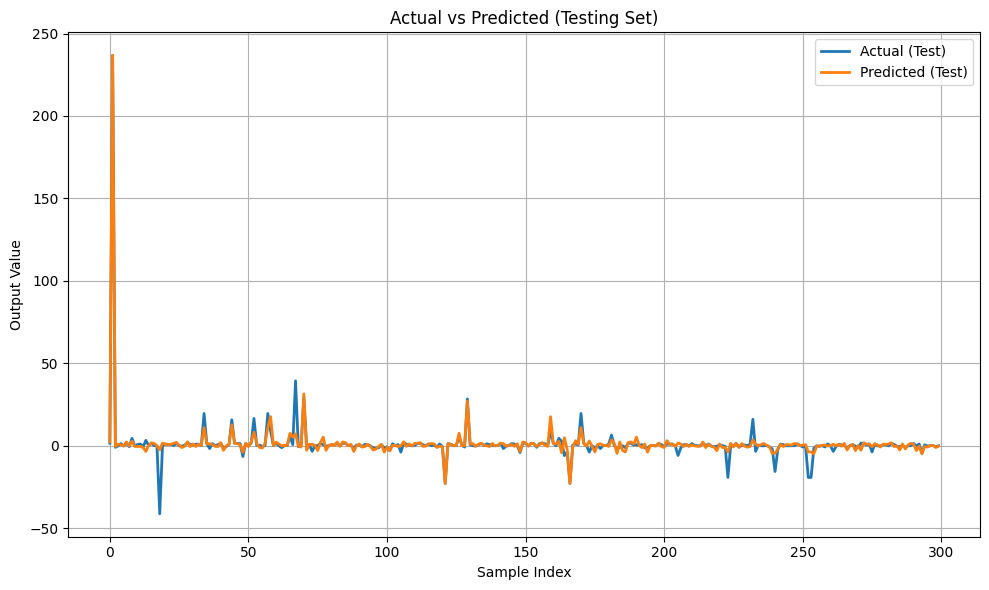

In [138]:
n_samples = len(y_test)
x = np.arange(n_samples)

plt.figure(figsize=(10,6))
plt.plot(x, y_test, label='Actual (Test)', linewidth=2)
plt.plot(x, y_test_pred, label='Predicted (Test)', linewidth=2)
plt.xlabel('Sample Index')
plt.ylabel('Output Value')
plt.title('Actual vs Predicted (Testing Set)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## 1.4 بخش چهارم: تلاش برای حل چالش ها

1.4.1

In [139]:
K = 120
np.random.seed(33)

# انتخاب K مرکز تصادفی
centers_idx = np.random.choice(len(X_train), K, replace=False)
miu = X_train[centers_idx]

In [140]:
# محاسبه عرض ثابت
from scipy.spatial.distance import pdist
sigma = np.mean(pdist(miu)) # میانگین فاصله بین مراکز

In [141]:
Phi_train = build_phi(X_train, miu, sigma)
Phi_test = build_phi(X_test, miu, sigma)

In [142]:
lambda_reg = 0.001  # ضریب رگولاریزیشن L2
# آموزش با Regularization L2
I = np.eye(K)
alpha_reg = np.linalg.inv(Phi_train.T @ Phi_train + lambda_reg * I) @ Phi_train.T @ y_train

In [143]:
y_train_pred_reg = Phi_train @ alpha_reg
y_test_pred_reg = Phi_test @ alpha_reg

In [144]:
rmse_train_reg = rmse(y_train, y_train_pred_reg)
rmse_test_reg = rmse(y_test, y_test_pred_reg)

In [145]:
print('rmse train reg =' , rmse_train_reg)
print('rmse test reg =' , rmse_test_reg)

rmse train reg = 4.486362571436537
rmse test reg = 4.508365625533462


In [146]:
lambda_list = [0.001, 0.01, 0.1, 1, 10]
rmse_train_list_lambda = []
rmse_test_list_lambda = []

for lambda_reg in lambda_list:
  I = np.eye(K)
  alpha_reg = np.linalg.inv(Phi_train.T @ Phi_train + lambda_reg * I) @ Phi_train.T @ y_train
  y_train_pred_reg_ = Phi_train @ alpha_reg
  y_test_pred_reg_ = Phi_test @ alpha_reg
  rmse_train_reg = rmse(y_train, y_train_pred_reg_)
  rmse_test_reg = rmse(y_test, y_test_pred_reg_)
  rmse_train_list_lambda.append(rmse_train_reg)
  rmse_test_list_lambda.append(rmse_test_reg)
  print(f'lambda = {lambda_reg}, rmse_train = {rmse_train_reg}, rmse_test = {rmse_test_reg}')

lambda = 0.001, rmse_train = 4.486362571436537, rmse_test = 4.508365625533462
lambda = 0.01, rmse_train = 4.5284283326069446, rmse_test = 4.574383221943914
lambda = 0.1, rmse_train = 4.671356239255258, rmse_test = 4.8341683478298165
lambda = 1, rmse_train = 6.123169989206108, rmse_test = 6.034371997197196
lambda = 10, rmse_train = 12.812456949841442, rmse_test = 11.610964067596742


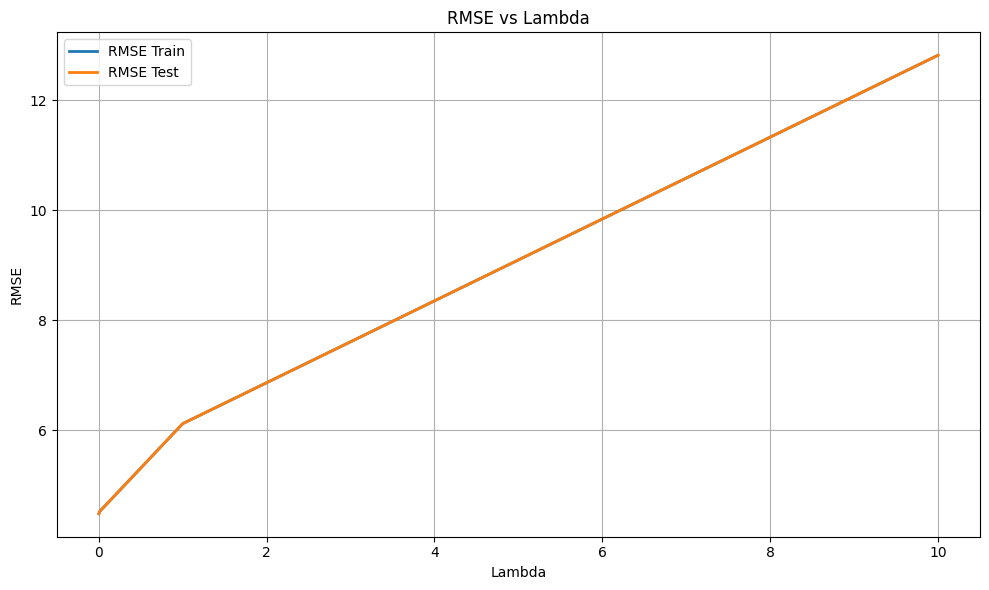

In [147]:
plt.figure(figsize=(10,6))
plt.plot(lambda_list, rmse_train_list_lambda, label='RMSE Train', linewidth=2)
plt.plot(lambda_list, rmse_train_list_lambda, label='RMSE Test', linewidth=2)
plt.xlabel('Lambda')
plt.ylabel('RMSE')
plt.title('RMSE vs Lambda')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

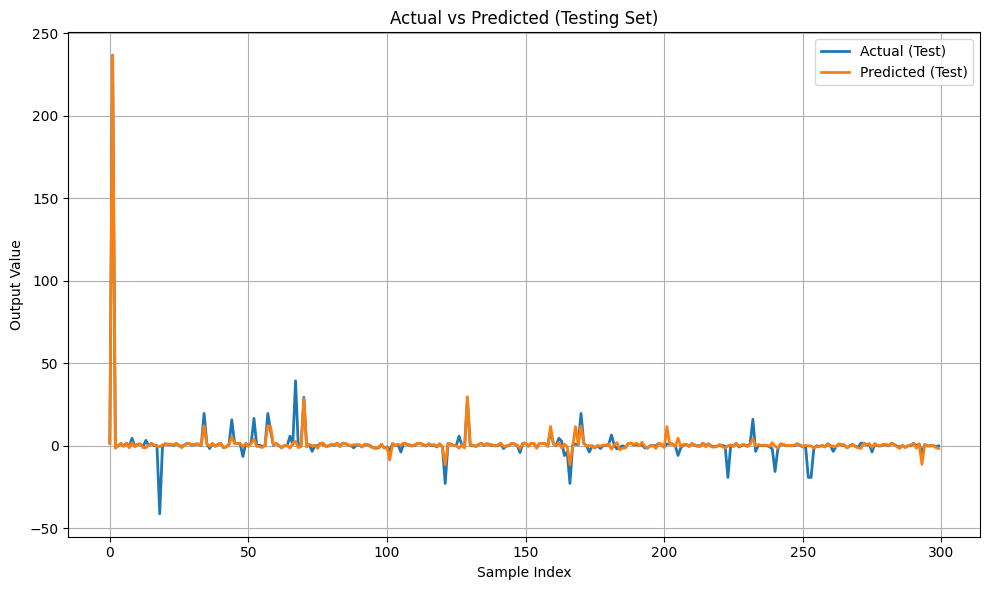

In [148]:
n_samples = len(y_test)
x = np.arange(n_samples)

plt.figure(figsize=(10,6))
plt.plot(x, y_test, label='Actual (Test)', linewidth=2)
plt.plot(x, y_test_pred_reg, label='Predicted (Test)', linewidth=2)
plt.xlabel('Sample Index')
plt.ylabel('Output Value')
plt.title('Actual vs Predicted (Testing Set)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

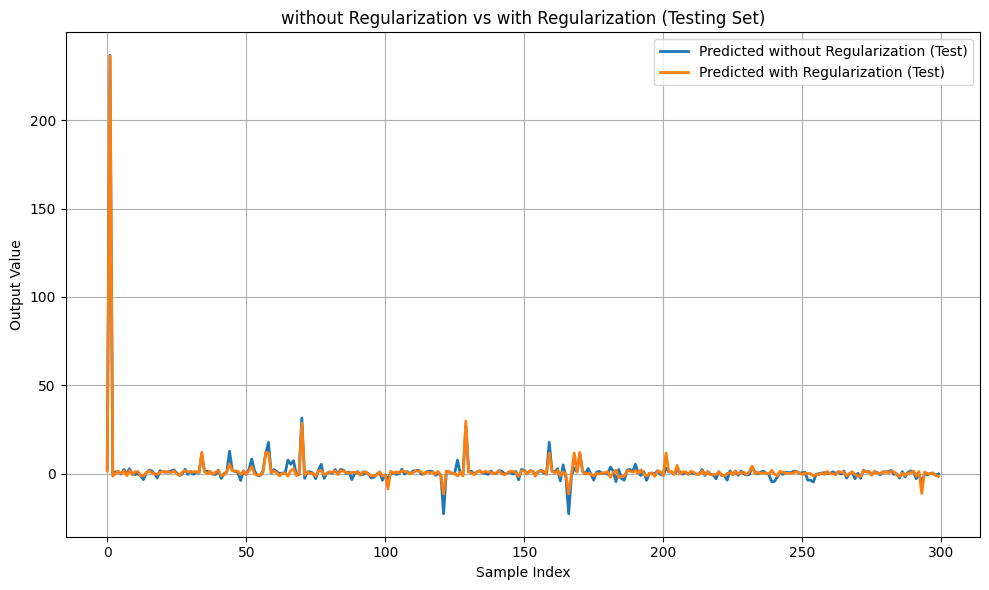

In [149]:
n_samples = len(y_test)
x = np.arange(n_samples)

plt.figure(figsize=(10,6))
plt.plot(x, y_test_pred, label='Predicted without Regularization (Test)', linewidth=2)
plt.plot(x, y_test_pred_reg, label='Predicted with Regularization (Test)', linewidth=2)
plt.xlabel('Sample Index')
plt.ylabel('Output Value')
plt.title('without Regularization vs with Regularization (Testing Set)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## 1.5 بخش پنجم

1.5.1

In [150]:
from sklearn.cluster import KMeans

In [151]:
# انتخاب رندوم نقاط تصادفی
K = 30
np.random.seed(33)

# انتخاب مراکز تصادفی
kmeans = KMeans(n_clusters=K, random_state=33)
kmeans.fit(X_train)
miu = kmeans.cluster_centers_

In [152]:
# محاسبه عرض ثابت
from scipy.spatial.distance import pdist
sigma = np.mean(pdist(miu)) # میانگین فاصله بین مراکز

In [153]:
Phi_train_kmeans = build_phi(X_train, miu, sigma)
Phi_test_kmeans = build_phi(X_test, miu, sigma)

In [154]:
# آموزش شبکه LLS آموزش
alpha_kmeans = np.linalg.pinv(Phi_train_kmeans) @ y_train
# پیش‌بینی آموزش
y_train_pred_kmeans = Phi_train_kmeans @ alpha_kmeans
y_test_pred_kmeans = Phi_test_kmeans @ alpha_kmeans

In [155]:
rmse_train_kmeans = rmse(y_train, y_train_pred_kmeans)
rmse_test_kmeans = rmse(y_test, y_test_pred_kmeans)

In [156]:
print('rmse train kmeans =' , rmse_train_kmeans)
print('rmse test kmeans =' , rmse_test_kmeans)

rmse train kmeans = 4.2432382666523685
rmse test kmeans = 4.3802406873157205


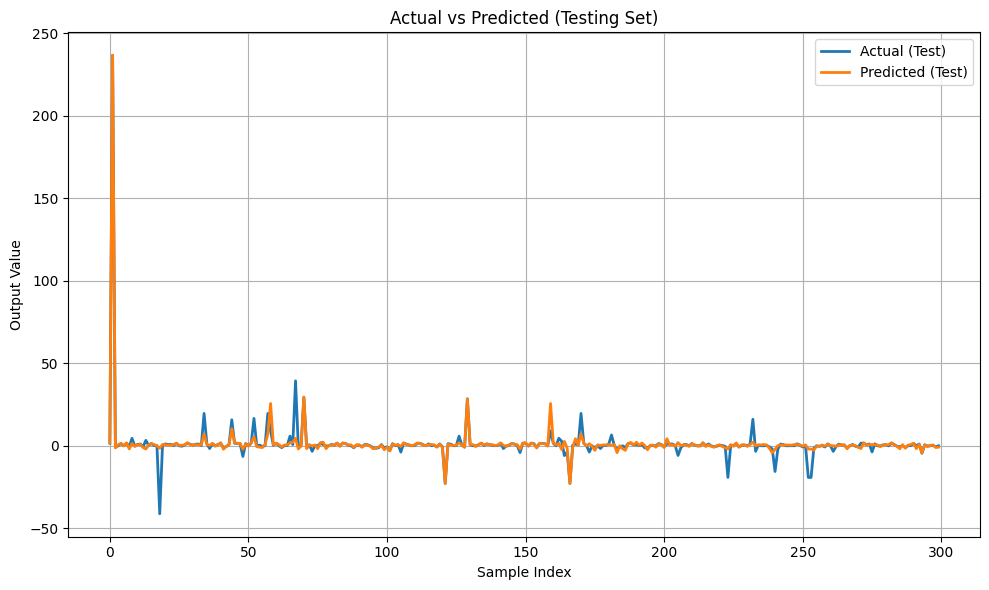

In [157]:
n_samples = len(y_test)
x = np.arange(n_samples)

plt.figure(figsize=(10,6))
plt.plot(x, y_test, label='Actual (Test)', linewidth=2)
plt.plot(x, y_test_pred_kmeans, label='Predicted (Test)', linewidth=2)
plt.xlabel('Sample Index')
plt.ylabel('Output Value')
plt.title('Actual vs Predicted (Testing Set)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

1.5.2

In [158]:
# تابع پیدا کردن فاصله مناسب
def min_dist(K, miu, p = 2):

  sigmas = np.zeros(K)

  for i in range(K):
      dists = np.linalg.norm(miu - miu[i], axis=1)

        # حذف فاصله صفر (با خودش)
      dists = dists[dists > 0]

      nearest_p = np.sort(dists)[:p]
      sigmas[i] = np.mean(nearest_p)

  return sigmas

sigmas = min_dist(K, miu)

In [159]:
# train
Phi_train_NN = np.zeros((len(X_train), K))

for i, x in enumerate(X_train):
    for j in range(K):
        Phi_train_NN[i, j] = rbf_gaussian(x, miu[j], sigmas[j])

# test
Phi_test_NN = np.zeros((len(X_test), K))

for i, x in enumerate(X_test):
    for j in range(K):
        Phi_test_NN[i, j] = rbf_gaussian(x, miu[j], sigmas[j])

In [160]:
alpha_NN = np.linalg.pinv(Phi_train_NN) @ y_train

y_train_pred_NN = Phi_train_NN @ alpha_NN
y_test_pred_NN = Phi_test_NN @ alpha_NN

In [161]:
rmse_train_NN = rmse(y_train, y_train_pred_NN)
rmse_test_NN = rmse(y_test, y_test_pred_NN)

In [162]:
print('rmse train NN =' , rmse_train_NN)
print('rmse test NN =' , rmse_test_NN)

rmse train NN = 3.914037439130676
rmse test NN = 3.9033446404207246


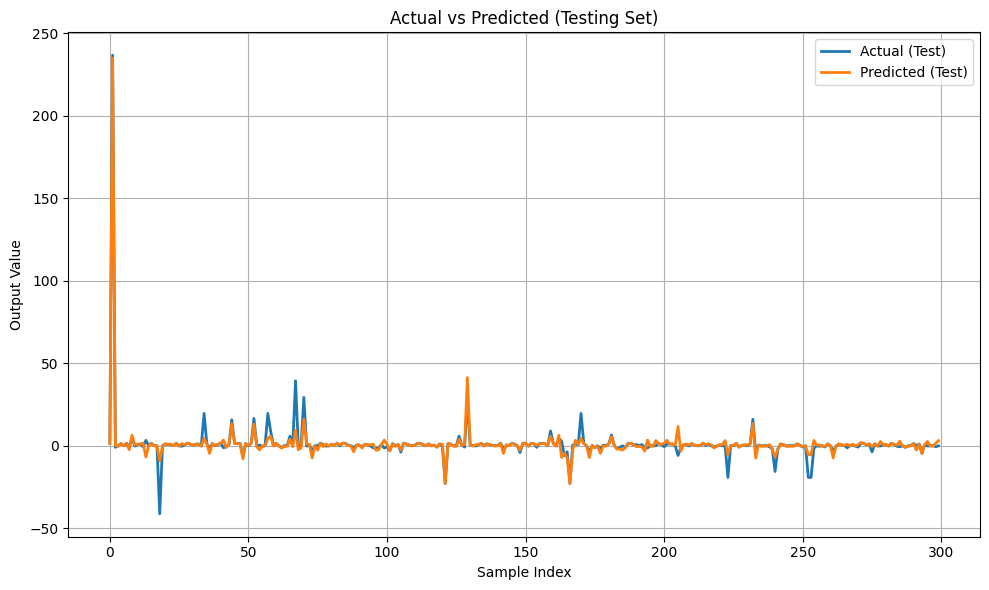

In [163]:
n_samples = len(y_test)
x = np.arange(n_samples)

plt.figure(figsize=(10,6))
plt.plot(x, y_test, label='Actual (Test)', linewidth=2)
plt.plot(x, y_test_pred_NN, label='Predicted (Test)', linewidth=2)
plt.xlabel('Sample Index')
plt.ylabel('Output Value')
plt.title('Actual vs Predicted (Testing Set)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Section 2

## 2.1 بخش اول: یادگیری ترتیبی۲۸ و معیار رشد

2.1.1

In [164]:
def new_neuron(x_new, y_true, y_pred, centers, epsilon=1, e_min=0.5):
      if len(centers) == 0:
        # اگر هنوز هیچ نورونی وجود ندارد، نورون جدید اضافه شود
        return True

      distances = np.linalg.norm(centers - x_new, axis=1)
      min_distance = np.min(distances)

      # خطای نمونه
      error = abs(y_true - y_pred)


      # بررسی دو معیار: تازگی و خطا
      if min_distance > epsilon or error > e_min:
          return True
      else:
          return False

In [165]:

# فرض: دو نورون موجود در شبکه
centers = np.array([[1, 1], [3, 3]])

# نمونه جدید
x_new = np.array([0.5, 0.5])
y_true = 1.0
y_pred = 0.4

# تست تابع
add_neuron = new_neuron(x_new, y_true, y_pred, centers, epsilon=1.0, e_min=0.5)
print("Need new neurons?", add_neuron)

Need new neurons? True


## 2.2  بخش دوم: پیاده سازی RBFNN تطبیقی با استراتژی هرس

In [166]:
import numpy as np

def prune_neurons(alpha, phi, delta=0.05, M=5, pruning_counters=None):
    """
    استراتژی هرس برای شبکه RBFNN تطبیقی

    پارامترها:
    alpha: وزن‌های خروجی (K,)
    phi: مقادیر فعالسازهای RBF برای نمونه n (K,)
    delta: آستانه بی‌اهمیتی نورون
    M: تعداد نمونه متوالی بی‌اهمیت برای حذف نورون
    pruning_counters: آرایه شمارنده نورون‌ها (K,)

    خروجی:
    alpha_new: وزن‌های خروجی به‌روزشده
    pruning_counters_new: شمارنده‌های به‌روز شده
    kept_indices: اندیس نورون‌های باقی‌مانده
    """
    K = len(alpha)

    if pruning_counters is None:
        pruning_counters = np.zeros(K, dtype=int)

    # 1. مشارکت هر نورون
    o_nk = alpha * phi  # (K,)

    # 2. نرمالسازی مشارکت
    o_n_max = np.max(np.abs(o_nk))
    if o_n_max == 0:
        r_kn = np.zeros_like(o_nk)
    else:
        r_kn = np.abs(o_nk) / o_n_max

    # 3. به‌روزرسانی شمارنده‌ها
    for k in range(K):
        if r_kn[k] < delta:
            pruning_counters[k] += 1
        else:
            pruning_counters[k] = 0

    # 4. پیدا کردن نورون‌هایی که باید حذف شوند
    remove_indices = np.where(pruning_counters > M)[0]
    kept_indices = [k for k in range(K) if k not in remove_indices]

    # 5. حذف نورون‌های غیر ضروری
    alpha_new = alpha[kept_indices]
    pruning_counters_new = pruning_counters[kept_indices]

    return alpha_new, pruning_counters_new, kept_indices


2.2.1

In [167]:
def new_neuron(x_new, y_true, y_pred, centers, epsilon=1, e_min=0.5):
      if len(centers) == 0:
        # اگر هنوز هیچ نورونی وجود ندارد، نورون جدید اضافه شود
        return True

      distances = np.linalg.norm(centers - x_new, axis=1)
      min_distance = np.min(distances)

      # خطای نمونه
      error = abs(y_true - y_pred)


      # بررسی دو معیار: تازگی و خطا

      return (min_distance > epsilon) and (error > e_min)

In [168]:
# ---------- هایپرپارامترها ----------
epsilon = 1.0   # آستانه تازگی
emin = 0.1      # آستانه خطا
kappa = 0.6     # ضریب همپوشانی برای sigma نورون جدید
eta = 0.05      # نرخ یادگیری LMS
delta = 0.1     # آستانه بی‌اهمیتی نورون برای هرس
M = 60          # تعداد نمونه متوالی برای هرس

# ---------- شبکه اولیه ----------
centers = []          # لیست مراکز μ_k
weights = []          # لیست وزن‌ها α_k
sigmas = []           # لیست عرض‌ها σ_k
pruning_counters = [] # شمارنده‌ها برای هرس
hidden_counts = []    # ذخیره تعداد نورون‌ها در هر مرحله

In [169]:
# ---------- حلقه آموزش ----------
for n in range(len(X_train)):
    x_n = X_train[n]
    y_n = y_train[n]

    K = len(weights)

    # محاسبه خروجی شبکه
    if K == 0:
        y_pred = 0
        phi_n = np.array([])
    else:
        phi_n = np.array([rbf_gaussian(x_n, centers[k], sigmas[k]) for k in range(K)])
        y_pred = np.dot(np.array(weights), phi_n)

    # بررسی نیاز به نورون جدید
    add_new = new_neuron(x_n, y_n, y_pred, centers, epsilon, emin)

    if add_new:
        # افزودن نورون جدید
        centers.append(x_n.copy())

        if isinstance(weights, np.ndarray):
            weights = weights.tolist()
        weights.append(y_n - y_pred)  # α_k+1 = e_n


        if len(centers) > 1:

            distances_to_existing = [np.linalg.norm(x_n - c) for c in centers[:-1]]
            sigma_new = kappa * np.mean(distances_to_existing)
        else:
            sigma_new = kappa * 1.0

        sigmas.append(sigma_new)
        pruning_counters.append(0)
    else:
        # به‌روزرسانی وزن‌ها با قانون LMS
        current_weights_arr = np.array(weights)
        updated_weights_arr = current_weights_arr + eta * (y_n - y_pred) * phi_n
        weights = updated_weights_arr.tolist()
    # هرس نورون‌ها
    if len(weights) > 0:

        weights_arr_for_pruning = np.array(weights)
        pruning_counters_arr_for_pruning = np.array(pruning_counters)

        current_K_for_pruning = len(weights)
        phi_for_pruning = np.array([rbf_gaussian(x_n, centers[k], sigmas[k]) for k in range(current_K_for_pruning)])

        weights_new_arr, pruning_counters_new_arr, kept_indices_arr = prune_neurons(weights_arr_for_pruning,
                                                               phi_for_pruning, # Using the re-calculated phi_for_pruning
                                                               delta, M, pruning_counters_arr_for_pruning)


        weights = weights_new_arr.tolist()
        pruning_counters = pruning_counters_new_arr.tolist()
        kept_indices = kept_indices_arr

        centers = [centers[k] for k in kept_indices]
        sigmas = [sigmas[k] for k in kept_indices]

    hidden_counts.append(len(weights))  # ذخیره تعداد نورون‌ها

2.2.2

In [170]:
# ---------- ارزیابی روی مجموعه تست ----------
y_pred_test = []
for x_n in X_test:
    K = len(weights)
    if K == 0:
        y_pred_test.append(0)
    else:
        phi_n = np.array([rbf_gaussian(x_n, centers[k], sigmas[k]) for k in range(K)])
        y_pred_test.append(np.dot(weights, phi_n))
y_pred_test = np.array(y_pred_test)

# محاسبه RMSE
rmse_test = np.sqrt(np.mean((y_test - y_pred_test)**2))
print("RMSE_test:", rmse_test)

RMSE_test: 6.178917995895899


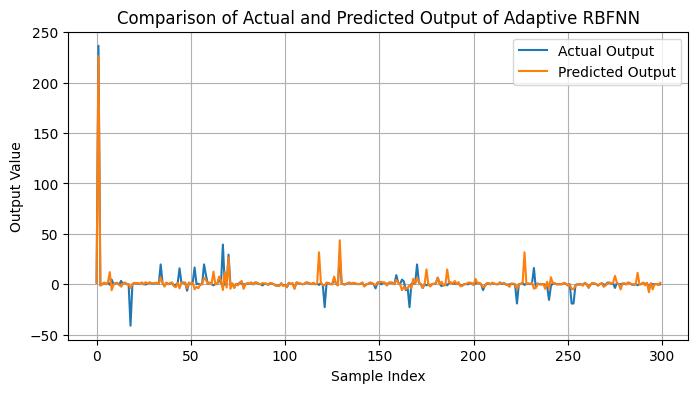

In [171]:
# ---------- نمودار خروجی پیش‌بینی شده و واقعی ----------
plt.figure(figsize=(8,4))
plt.plot(y_test, label="Actual Output")
plt.plot(y_pred_test, label="Predicted Output")
plt.xlabel("Sample Index")
plt.ylabel("Output Value")
plt.title("Comparison of Actual and Predicted Output of Adaptive RBFNN")
plt.legend()
plt.grid(True)
plt.show()

In [172]:
# ---------- گزارش بهترین هایپرپارامترها ----------
print("Best Hyperparameters Used:")
print(f"epsilon = {epsilon}, emin = {emin}, kappa = {kappa}, eta = {eta}, delta = {delta}, M = {M}")
print("Final Number of Hidden Neurons:", len(weights))

Best Hyperparameters Used:
epsilon = 1.0, emin = 0.1, kappa = 0.6, eta = 0.05, delta = 0.1, M = 60
Final Number of Hidden Neurons: 34


2.2.3

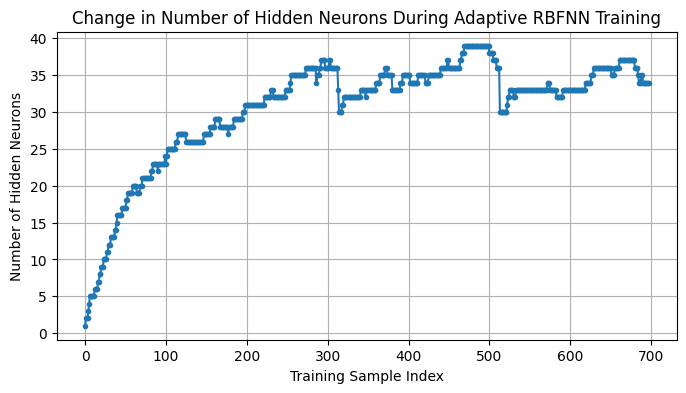

In [173]:
plt.figure(figsize=(8,4))
plt.plot(hidden_counts, marker='o', markersize=3)
plt.xlabel("Training Sample Index")
plt.ylabel("Number of Hidden Neurons")
plt.title("Change in Number of Hidden Neurons During Adaptive RBFNN Training")
plt.grid(True)
plt.show()